In [522]:
%matplotlib inline
import numpy as np
import pandas as pd
import gzip

In [523]:
import sys
sys.path.append("/Users/casey/git/mumodo/packages")

In [524]:
from mumodo import mumodoIO as mm

In [525]:
import os

folders = os.listdir('../cleaned')

folders

['r10_20160512_141115',
 'r11_20160513_104828',
 'r12_20160513_113029',
 'r13_20160513_121112',
 'r14_20160513_133005',
 'r1_20160509_120534',
 'r3_20160510_101902',
 'r4_20160510_121233',
 'r5_20160510_142531',
 'r6_20160510_152235',
 'r7questionnaire_20160511_142415',
 'r8_20160512_101310',
 'r9_20160512_131625']

In [526]:
def getstrings(xmline):
    xmline = xmline.strip()
    xmline = xmline.split(' ')
    found = {}
    for x in xmline:
        if '=' in x:
            x = x.replace('"', '').replace('>','')
            x = x.split("=")
            found[x[0]] = x[1]
    return found

In [533]:
data = {}

for f in folders:  
    pid = f[:2]
    frame =  gzip.open(os.path.join('../cleaned/', f, 'log.xio.gz'))
    d = []
    for line in frame:
        s = getstrings(line)
        if 'sensorName' not in s: continue
        if 'TASK' in s['sensorName']:
            d.append(s['value'])
    data[pid] = d

In [534]:
def init_counter(q):
    if 'p2' in q:
        return {'Phase1':0, 'Phase2':0}
    return {'Phase3':0, 'Phase2':0}

In [535]:
def handle_responses(data):
    
    responses = {}
    totals = {}
    for pid in data:
        frame = data[pid]
        for row in frame:
            if 'response' not in row: continue
            row = row.split(':')
            q = row[1]
            a = row[2]
            if q not in responses:
                totals[q] = 0.0
                responses[q] = {}
                responses[q] = init_counter(q)
            totals[q] = totals[q] + 1
            if a == 'Beide':
                #for p in responses[q]:
                #    responses[q][p] + 1.0
                continue
            elif a == 'Keiner':
                continue
            else:
                responses[q][a] = responses[q][a] + 1.0
    print totals
    return responses


In [536]:
responses = handle_responses(data)

{'p3q12': 8.0, 'p3q10': 8.0, 'p3q11': 8.0, 'p3q8': 8.0, 'p3q9': 8.0, 'p3q4': 8.0, 'p3q5': 8.0, 'p2q10': 6.0, 'p2q1': 6.0, 'p2q3': 6.0, 'p2q2': 6.0, 'p2q5': 6.0, 'p2q4': 6.0, 'p2q7': 6.0, 'p2q6': 6.0, 'p2q9': 6.0, 'p2q8': 6.0, 'p3q6': 8.0, 'p3q7': 8.0, 'p3q1': 8.0, 'p3q2': 8.0, 'p3q3': 8.0}


In [537]:
import matplotlib.pyplot as plt
keys = responses.keys()
i = 0

p3q12


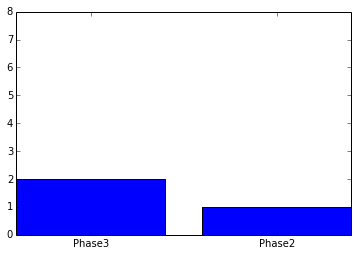

In [538]:
print keys[i]
D = responses[keys[i]]
plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), D.keys())
plt.gca().set_ylim([0,8])
i += 1

In [514]:
import scipy.stats

scipy.stats.binom_test(0, 8, 1.0/2.0)

0.0078125

In [541]:
scipy.stats.ttest_rel([2,1,0,0,1],[1,0,1,1,1])

(array(-1.0000000000000002), 0.37390096630005892)